# Second part of project

## In this file, i'm showing the second part of my project. It is for ( Text Classification )

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re

In [2]:
bw_df = pd.read_csv('badwords.csv')

In [3]:
bdf = bw_df.rename(columns={'Name': 'word'})
bdf

,word
0,2g1c
1,2 girls 1 cup
2,acrotomophilia
3,alabama hot pocket
4,alaskan pipeline
...,...
406,SSG 08
407,Tec-9
408,UMP-45
409,USP-S


### Read goodwords dataset

In [4]:
gdf = pd.read_csv('goodwords.csv', delimiter='\t')

In [5]:
gdf

,word
0,Bird Cage Bird Baths
1,Bird Cage Food & Water Dishes
2,Bicycle Bibs
3,Bicycle Jerseys
4,Bicycle Shorts & Briefs
...,...
1738,Watercraft Fuel Tanks & Parts
1739,Watercraft Steering Cables
1740,Watercraft Steering Wheels
1741,ATVs & UTVs


In [6]:
bdf['target'] = 'bad'
gdf['target'] = 'good'
words = pd.concat([bdf, gdf]).reset_index(drop = True)
words

,word,target
0,2g1c,bad
1,2 girls 1 cup,bad
2,acrotomophilia,bad
3,alabama hot pocket,bad
4,alaskan pipeline,bad
...,...,...
2149,Watercraft Fuel Tanks & Parts,good
2150,Watercraft Steering Cables,good
2151,Watercraft Steering Wheels,good
2152,ATVs & UTVs,good


In [7]:
words.isna().sum()

word      0
target    0
dtype: int64

## Let's start

In [8]:
### Define heat map function for matrix confusion 

In [9]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_bad', 'predicted_good'], 
                yticklabels=['actual_bad', 'actual_good'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [11]:
x_train,x_test,y_train,y_test = train_test_split(words['word'], words.target, test_size=0.2, random_state=2020)

### 1. Decision Tree

In [12]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

DT_model = pipe.fit(x_train, y_train)
DT_prediction = DT_model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, DT_prediction)*100,2)))

accuracy: 81.67%


[0.817, 0.816, 1.0, 0.899]

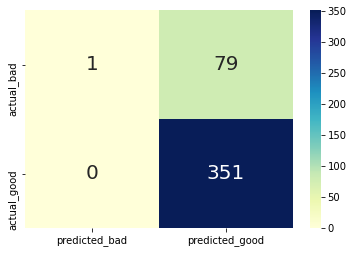

In [13]:
conf_matrix(y_test, DT_prediction)

In [14]:
print(classification_report(y_test, DT_prediction))

              precision    recall  f1-score   support

         bad       1.00      0.01      0.02        80
        good       0.82      1.00      0.90       351

    accuracy                           0.82       431
   macro avg       0.91      0.51      0.46       431
weighted avg       0.85      0.82      0.74       431



### 2. Logistic Regression Classifier

In [15]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

LR_model = pipe.fit(x_train, y_train)
LR_prediction = LR_model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, LR_prediction)*100,2)))

accuracy: 81.9%


[0.819, 0.818, 1.0, 0.9]

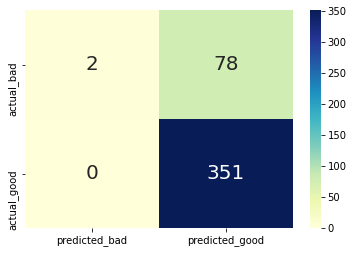

In [16]:
#print(confusion_matrix(y_test, prediction))
conf_matrix(y_test, LR_prediction)

In [17]:
print(classification_report(y_test, LR_prediction))

              precision    recall  f1-score   support

         bad       1.00      0.03      0.05        80
        good       0.82      1.00      0.90       351

    accuracy                           0.82       431
   macro avg       0.91      0.51      0.47       431
weighted avg       0.85      0.82      0.74       431



### 3. Support Vector Classifier

In [18]:
x_train,x_test,y_train,y_test = train_test_split(words['word'], words.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

SVC_model = pipe.fit(x_train, y_train)
SVC_prediction = SVC_model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, SVC_prediction)*100,2)))

accuracy: 84.45%


[0.845, 0.843, 0.994, 0.912]

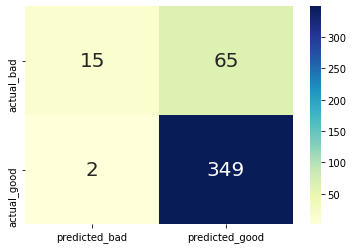

In [19]:
conf_matrix(y_test, SVC_prediction)

In [20]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

         bad       0.88      0.19      0.31        80
        good       0.84      0.99      0.91       351

    accuracy                           0.84       431
   macro avg       0.86      0.59      0.61       431
weighted avg       0.85      0.84      0.80       431



### 4. Random Forest Classifier

In [21]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RF_model = pipe.fit(x_train, y_train)
RF_prediction = RF_model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, RF_prediction)*100,2)))

accuracy: 86.77%


[0.868, 0.99, 0.846, 0.912]

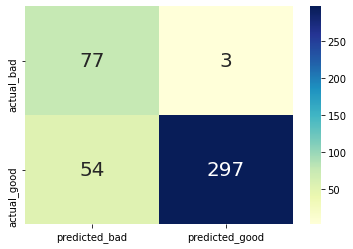

In [22]:
conf_matrix(y_test, RF_prediction)

In [23]:
print(classification_report(y_test, RF_prediction))

              precision    recall  f1-score   support

         bad       0.59      0.96      0.73        80
        good       0.99      0.85      0.91       351

    accuracy                           0.87       431
   macro avg       0.79      0.90      0.82       431
weighted avg       0.92      0.87      0.88       431



### 5. Multinomial Naive Bayes Classifier

In [24]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

NB_model = pipe.fit(x_train, y_train)
NB_prediction = NB_model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, NB_prediction)*100,2)))

accuracy: 82.37%


[0.824, 0.822, 1.0, 0.902]

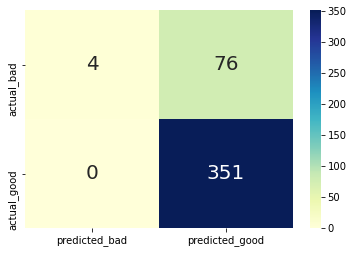

In [25]:
conf_matrix(y_test, NB_prediction)

In [26]:
print(classification_report(y_test, NB_prediction))

              precision    recall  f1-score   support

         bad       1.00      0.05      0.10        80
        good       0.82      1.00      0.90       351

    accuracy                           0.82       431
   macro avg       0.91      0.53      0.50       431
weighted avg       0.86      0.82      0.75       431



### 6. KNN Classifier

In [27]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

KNN_model = pipe.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, KNN_prediction)*100,2)))

accuracy: 87.24%


[0.872, 0.96, 0.88, 0.918]

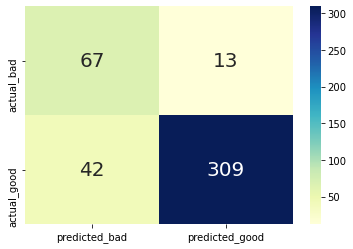

In [28]:
conf_matrix(y_test, KNN_prediction)

In [29]:
print(classification_report(y_test, KNN_prediction))

              precision    recall  f1-score   support

         bad       0.61      0.84      0.71        80
        good       0.96      0.88      0.92       351

    accuracy                           0.87       431
   macro avg       0.79      0.86      0.81       431
weighted avg       0.90      0.87      0.88       431



### As the results of accuracy, i think KNN model hav a best score

In [30]:
KNN_model.predict(['shotgun as new for sell']) ## an example of prohibited (bad) product title

array(['bad'], dtype=object)

In [31]:
KNN_model.predict(['sell shotgun for playstation game']) ## an example of non-prohibited (Good) product title

array(['good'], dtype=object)

### Ok, after this expermint i'm ready to produce the model by using pickle package for deployment step

In [ ]:
pickle.dump(KNN_model, open('text-model.pkl','wb'))